In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Read the CSV file
df = pd.read_csv('large_employee_data.csv')
print("Original DataFrame:")
print(df.head())



Original DataFrame:
    ID              Name  Age Department  Salary
0  497  Charlie Martinez   45         IT   39866
1  395       Diana Smith   49    Finance   73108
2  590       Diana Davis   41    Finance   76486
3  918     Charlie Jones   58         HR   36971
4  654  George Rodriguez   26  Marketing  103445


In [31]:
print("\nDataFrame Info:")
print(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1050 non-null   int64 
 1   Name        1026 non-null   object
 2   Age         1050 non-null   int64 
 3   Department  1050 non-null   object
 4   Salary      1050 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 41.1+ KB
None


In [3]:
# 1. Handling missing values
print("\n1. Handling missing values:")
# Fill missing values in 'Name' with 'Unknown'
df['Name'] = df['Name'].fillna('Unknown')
print(df.isnull().sum())


1. Handling missing values:
ID            0
Name          0
Age           0
Department    0
Salary        0
dtype: int64


In [4]:
# 2. Handling duplications
print("\n2. Handling duplications:")
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
# Remove duplicate rows based on all columns except 'ID'
df_no_dupes = df.drop_duplicates(subset=df.columns.difference(['ID']))
print(f"Number of rows after removing duplicates: {len(df_no_dupes)}")


2. Handling duplications:
Number of duplicate rows: 0
Number of rows after removing duplicates: 1000


In [33]:
# 3. Additional preprocessing
print("\n3. Additional preprocessing:")
# Convert 'Name' to title case
df_no_dupes['Name'] = df_no_dupes['Name'].str.title()



3. Additional preprocessing:


In [35]:
# Create a new column 'Salary_Category'
df_no_dupes['Salary_Category'] = pd.cut(df_no_dupes['Salary'], 
                                        bins=[0, 50000, 80000, float('inf')],
                                        labels=['Low', 'Medium', 'High'])


In [37]:
# Create a new column 'Age_Group'
df_no_dupes['Age_Group'] = pd.cut(df_no_dupes['Age'], 
                                  bins=[0, 30, 45, float('inf')],
                                  labels=['Young', 'Middle', 'Senior'])

In [39]:
# 4. Export the preprocessed data
df_no_dupes.to_csv('preprocessed_large_employee_data.csv', index=False)
print("\nPreprocessed data has been exported to 'preprocessed_large_employee_data.csv'")


Preprocessed data has been exported to 'preprocessed_large_employee_data.csv'


In [41]:
# 5. Basic data analysis
print("\n5. Basic data analysis:")
print(df_no_dupes.describe())
print("\nAverage salary by department:")
print(df_no_dupes.groupby('Department')['Salary'].mean())


5. Basic data analysis:
                ID          Age        Salary
count  1000.000000  1000.000000    1000.00000
mean    530.500000    43.014000   73117.68000
std     347.948729    12.333772   25532.60997
min       1.000000    22.000000   30162.00000
25%     251.750000    32.000000   51665.25000
50%     510.500000    44.000000   72189.50000
75%     771.250000    54.000000   94663.75000
max    1990.000000    64.000000  119881.00000

Average salary by department:
Department
Finance       71147.766467
HR            69626.420118
IT            74286.000000
Marketing     74305.677019
Operations    74946.092593
Sales         74477.508671
Name: Salary, dtype: float64


[]

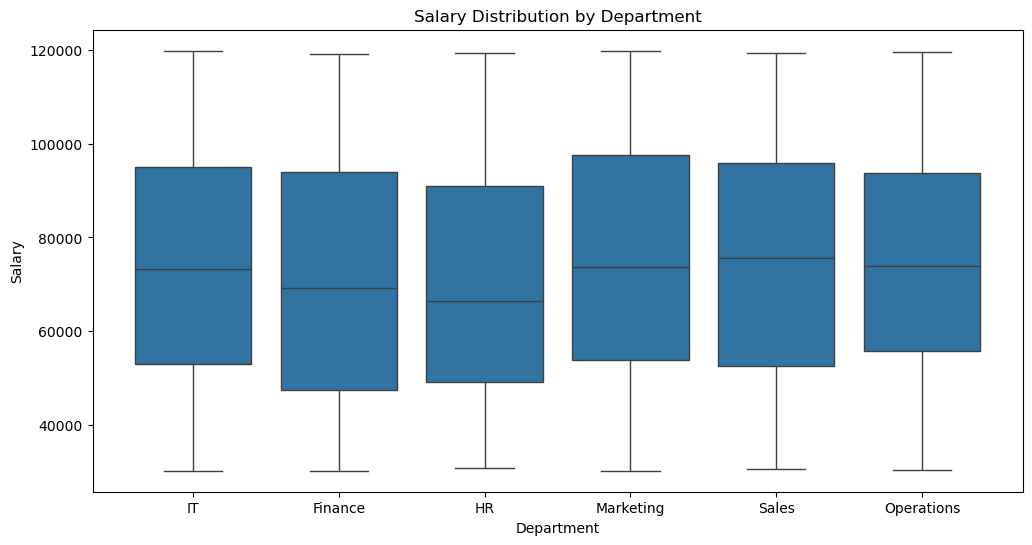

In [43]:
# 6. Data Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Salary', data=df_no_dupes)
plt.title('Salary Distribution by Department')
plt.savefig('salary_distribution.png')
plt.plot()

[]

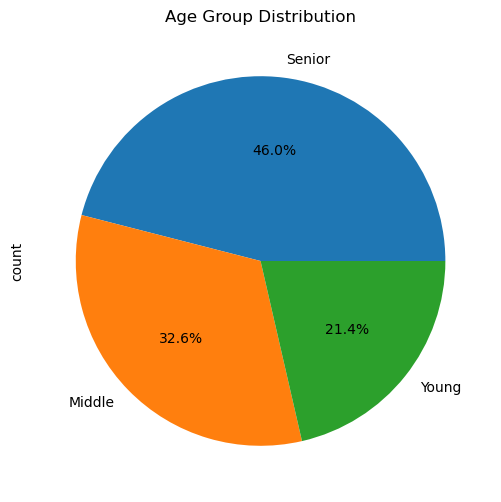

In [45]:
plt.figure(figsize=(10, 6))
df_no_dupes['Age_Group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Age Group Distribution')
plt.savefig('age_group_distribution.png')
plt.plot()


In [47]:
print("\nData visualizations have been saved as 'salary_distribution.png' and 'age_group_distribution.png'")


Data visualizations have been saved as 'salary_distribution.png' and 'age_group_distribution.png'
